<a href="https://colab.research.google.com/github/svanhemert00/lmu-isba-4790/blob/main/Sebastian_Van_Hemert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Ingestion & Cleaning
1. Read the dataset into a dataframe. Use appropriate functions to display the first few rows, inspect the column data types, and to see a summary statistics of the dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("garments_worker_productivity.csv", na_values=['?',
                                                                'nan',
                                                                'NAN',
                                                                'Nan',
                                                                'NaN'])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


2. Strip the empty space from department names. Make sure you print out the unique values in the department column before and after stripping it.

In [5]:
df.department.nunique() # before

3

In [6]:
df['department'] = df.department.str.strip()

In [7]:
df.department.nunique() # after

2

3. The number of work in progress (wip) in the "finishing" department is specified as null values in the dataset. That is because there is no wip in that department. Threfore, you should replace the missing values in the wpi column with the number zero.

    Check to make sure there is no missing values left in the dataset.

In [8]:
df.wip.fillna(value=0, inplace=True)

4. Add a new Boolean column called "success" that is True if the "actual_productivity" is equal to or higher than the "targeted_productivity". The column is False if that is not the case.

In [9]:
df['success'] = df.actual_productivity >= df.targeted_productivity

##Data Exploration & Visualization


5. Calculate the pairwaise correlation of the features in the dataset, and display the features that are correlated with 'success' for more than 10%. They should be sorted from largest correlation to the smallest.

In [10]:
corr = df.corr()
corr = pd.DataFrame(corr.loc[:,"success"])
corr = corr[corr['success'] > .1]
corr = corr.sort_values('success', ascending=False)
corr

,success
success,1.000000
actual_productivity,0.659135
no_of_workers,0.246983
over_time,0.190724
smv,0.156531
wip,0.151204


6. Diplay the average, minimum, and maximum of actual_productivity for each department. Explain in bried if there is productivity differences between the departments?

In [11]:
df.groupby('department')['actual_productivity'].agg(['mean', 'min', 'max'])
# the finishing department seems to be more productive than the sweing department

,mean,min,max
department,,,
finishing,0.752951,0.235795,1.120437
sweing,0.722013,0.233705,1.100484


7. Calculate the average of actual_productivity and targeted_productivity for each team. Use a line plot to visualize both averages for all the teams. Explain in brief which teams have beaten the target and which ones have not. 


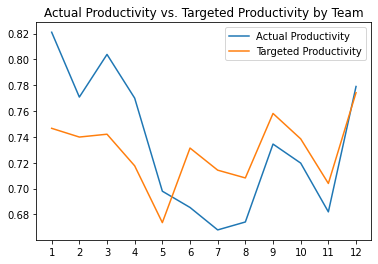

In [12]:
average_by_team = df.groupby('team')[['actual_productivity', 'targeted_productivity']].mean()

plt.plot(average_by_team.actual_productivity, label='Actual Productivity')
plt.plot(average_by_team.targeted_productivity, label='Targeted Productivity')
plt.title('Actual Productivity vs. Targeted Productivity by Team')
plt.legend(loc='best')
plt.xticks(average_by_team.index)
plt.show()

# Teams 1, 2, 3, 4, 5, 12 have beaten the target
# Teams 6, 7, 8, 9, 10, 11 have beaten the target

8. Calculate the average actual_productivity for each "day" of the week. Use a bar chart to plot the dataover the weekdays. Make sure the names of the weekdays appear in the right order. In brief, explain if there is any pattern in the data.


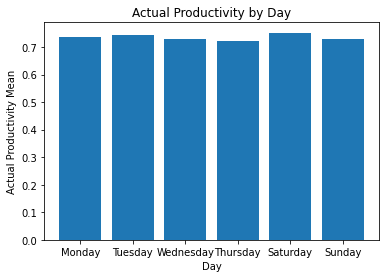

In [13]:
actual_productivity_by_day = pd.DataFrame(df.groupby('day')['actual_productivity'].mean())
monday = pd.DataFrame(actual_productivity_by_day.loc['Monday',:])
tuesday = pd.DataFrame(actual_productivity_by_day.loc['Tuesday',:])
wednesday = pd.DataFrame(actual_productivity_by_day.loc['Wednesday',:])
thursday = pd.DataFrame(actual_productivity_by_day.loc['Thursday',:])
saturday = pd.DataFrame(actual_productivity_by_day.loc['Saturday',:])
sunday = pd.DataFrame(actual_productivity_by_day.loc['Sunday',:])

actual_productivity_by_day = pd.concat([monday,tuesday,wednesday,thursday,saturday,sunday], axis = 1)
actual_productivity_by_day = actual_productivity_by_day.T # https://stackoverflow.com/questions/31658183/how-to-switch-columns-rows-in-a-pandas-dataframe
plt.bar(actual_productivity_by_day.index,actual_productivity_by_day.actual_productivity)
plt.title('Actual Productivity by Day')
plt.xlabel('Day')
plt.ylabel('Actual Productivity Mean')
plt.show()

##Data Preparation

9. The three features of "quarter", "department", and "day" are categorical variables. Use proper coding (one-hot or label encoding) to convert them to numerical variables. Explain the reason behind your choice of coding in brief. 

In [14]:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['quarter'])
# this didn't work:
  # quarter_dict = {'Quarter1': 1, 'Quarter2': 2, 'Quarter3': 3, 'Quarter4': 4, 'Quarter5': 5}
  # df['quarter'] = df['quarter'].map(quarter_dict)
  # I attempted label encoding here because 'Quarter1' could just be '1'; 'Quarter2', '2'; and so on...
  # I just went with one-hot encoding in the end

In [15]:
# one-hot encoding:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['department'])

In [16]:
# one-hot encoding:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['day'])
df

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,Quarter4,Quarter5,finishing,sweing,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1/1/2015,1,0.75,3.94,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,10,0.75,2.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1193,3/11/2015,8,0.70,3.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1194,3/11/2015,7,0.65,3.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1195,3/11/2015,9,0.75,2.90,0.0,1800,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


10. We do not think the "date" column will be useful to our modeling. You should drop the column from the dataset. moreover, drop every other non-numerical column. you should drop them all in one statement.

In [17]:
df1 = df.select_dtypes(exclude='object')
df1

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,Quarter4,Quarter5,finishing,sweing,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1193,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1194,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1195,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,...,0,0,1,0,0,0,0,0,0,1


##Modeling

11. Create a decision tree model to predict the "success" variable. Make sure to drop the 'success','targeted_productivity','actual_productivity' variables from the predictive dataset (X) because we calculated 'success' from them. Use train and test datasets and compare their accuracy to make sure you are not over-fitting. Tune the model to get the most accurate model you can.

    Print the train and test accuracy rate, and plot the tree for your best model.
    Explain in brief how you think your model performs.

Train Accuracy Score: 0.8014629049111808
Test Accuracy Score: 0.7875


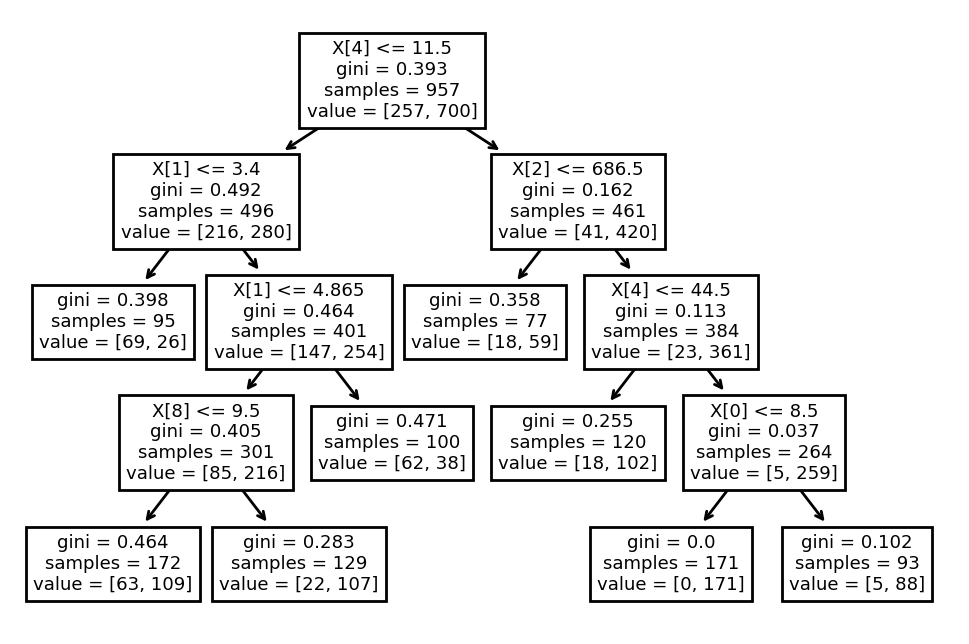

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

X = df1.drop(['success', 'targeted_productivity', 'actual_productivity'], axis=1)
y = df1.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.08)
dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_test))

plt.figure(dpi=200)
plot_tree(dtc)
plt.show()

12. Create Random Forest model to predict the 'success' variable, like the previous question. You can use the same X and y datasets. Tune your model to get the best accuracy rate over the train and test datasets. Print the accuracy rates for your best model. Explain in brief how you think your model performs.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
df2 = df.select_dtypes(exclude='object')
X = df2.drop(['success', 'targeted_productivity', 'actual_productivity'], axis=1)
y = df2.success

rfc = RandomForestClassifier(n_estimators=10, max_depth=9, min_samples_leaf=.04)

rfc.fit(X_train, y_train)

y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_test))


Train Accuracy Score: 0.7816091954022989
Test Accuracy Score: 0.7541666666666667


13. Create a linear regression model to predict "actual_productivity" variable. Make sure to drop the 'targeted_productivity', 'actual_productivity', 'success'variables from the predictive dataset (X) because they are closely claculated in relation to target feature. Use train and test datasets and compare their accuracy (error rate). Plot the coefficients and explain in brief which variables contribute most to team productivity.


Error Rate: 0.5337005181696803
Error Rate: 0.48205713885731766
0.14572772440556025


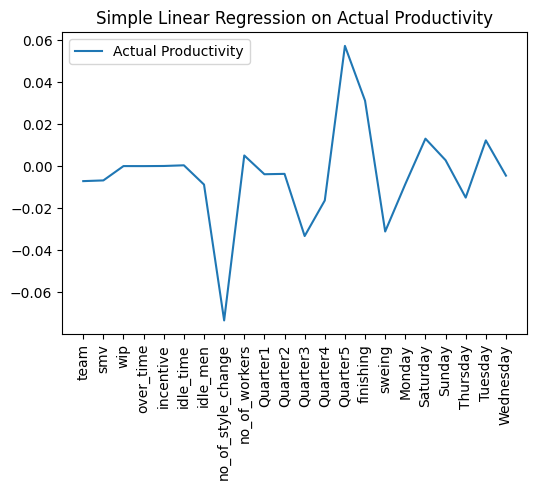

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error

X = df2.drop(['targeted_productivity', 'actual_productivity', 'success'], axis=1)
y = df2.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print("Error Rate:", max_error(y_train, y_pred_train))
print("Error Rate:", max_error(y_test, y_pred_test))
print(lr.score(X, y))

plt.figure(dpi=100)
plt.plot(X_test.columns, lr.coef_, label='Actual Productivity')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Simple Linear Regression on Actual Productivity')
plt.show()

# Quarter 5 contributes to Team Productivity the most. Maybe this is caused by a sudden surge in demand experienced during this quarter

14. Standardize the X dataset and repeate the linear regression modeling. Briefly explain if that improves the performance of your model.


Error Rate: 0.5425897596180769
Error Rate: 0.5183340239517463
0.14438714891628435


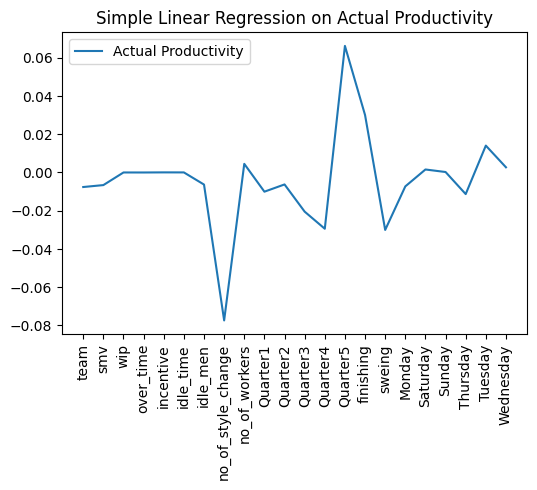

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error
from sklearn.preprocessing import StandardScaler

lr = LinearRegression()
stdsc = StandardScaler()

X = df2.drop(['targeted_productivity', 'actual_productivity', 'success'], axis=1)
scaled_data = stdsc.fit_transform(X)
y = df2.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print("Error Rate:", max_error(y_train, y_pred_train))
print("Error Rate:", max_error(y_test, y_pred_test))
print(lr.score(X, y))

plt.figure(dpi=100)
plt.plot(X_test.columns, lr.coef_, label='Actual Productivity')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Simple Linear Regression on Actual Productivity')
plt.show()

# Quarter 5 contributes to Team Productivity the most. Maybe this is caused by a sudden surge in demand experienced during this quarter